##### Basic image processing with in built functions

```python

from images import Image
#  Or
# from PIL import Image

# Loads and returns an image from a file with the given filename. Raises an error if the filename is not found or the file is not a GIF file.
i = Image(filename)

# Creates and returns a blank image with the given dimensions. The color of each pixel is transparent, and the filename is the empty string.
i = Image(width, height)

# Returns the width of i in pixels.
i.getWidth()
# Returns the height of i in pixels.
i.getHeight()

# Returns a tuple of integers representing the RGB values of the pixel at position (x, y).
i.getPixel (x, y)

# Replaces the RGB value at the position (x, y) with the RGB value given by the tuple (r. 9, b).
i.setPixel (x, y, (r, g, b))

# Displays i in a window.
# The user must close the window to return control to the method's caller.
i.draw()

# Returns a copy of i.
i.clone()

# Saves i under its current filename. If i does not yet have a filename, save does nothing.
i.save()
# Saves i under filename. Automatically adds a .gif extension if filename does not contain it.
i.save(filename)

```

In [1]:
from PIL import Image

In [53]:
i = Image.open('cat.jpg')
i.size

(640, 853)

In [3]:
def average(triple):
    a, b, c = triple
    return (a+b+c)//3

In [62]:
def monochrome(triple):
    a, b, c = triple
    px = 0 if (a+b+c)//3 < 127 else 1
    return px

In [56]:
def greyscale(triple):
    r, g, b = triple
    return int(r * 0.299 + g * 0.587 + b * 0.114)

In [72]:
def monochrome2(triple):
    r, g, b = triple
    weighted_sum_rgb =  r * 0.299 + g * 0.587 + b * 0.114
    px = 0 if weighted_sum_rgb < 127 else 1
    return px

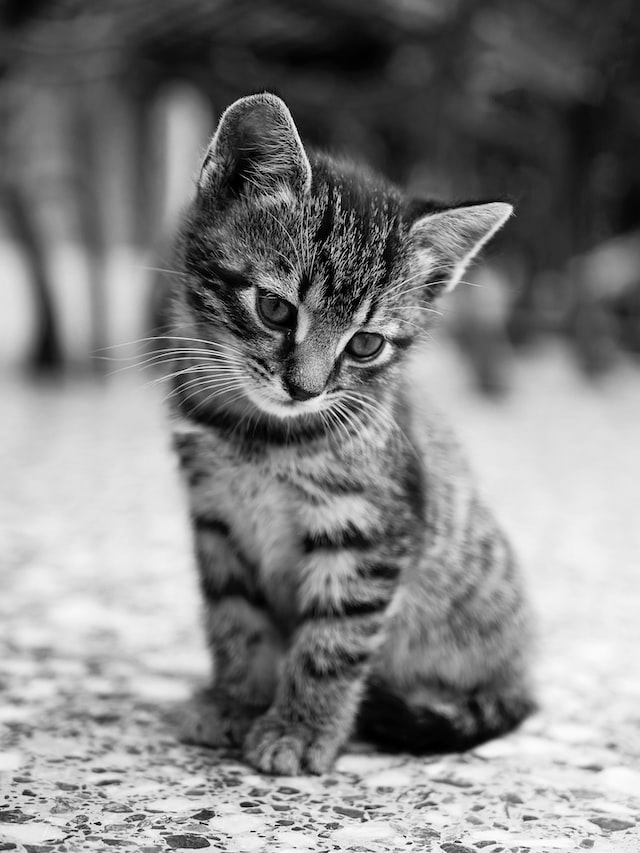

In [47]:
j = Image.new("L", (i.width, i.height))
for y in range(i.height):
    for x in range(i.width):
        old_px = i.getpixel((x, y))
        new_px = average(old_px)
        j.putpixel((x, y), new_px)

j

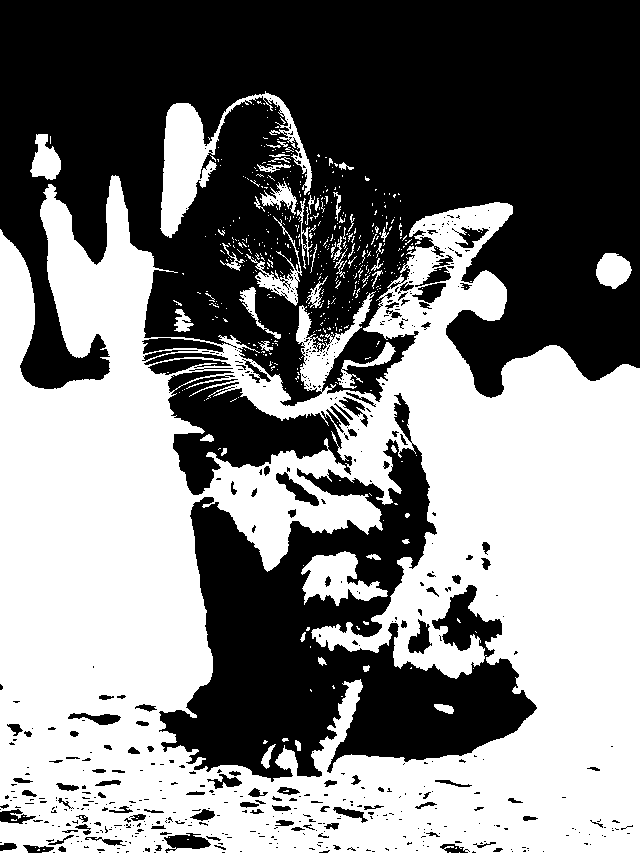

In [63]:
k = Image.new("1", (i.width, i.height))
for y in range(i.height):
    for x in range(i.width):
        old_px = i.getpixel((x, y))
        new_px = monochrome(old_px)
        k.putpixel((x, y), new_px)

k

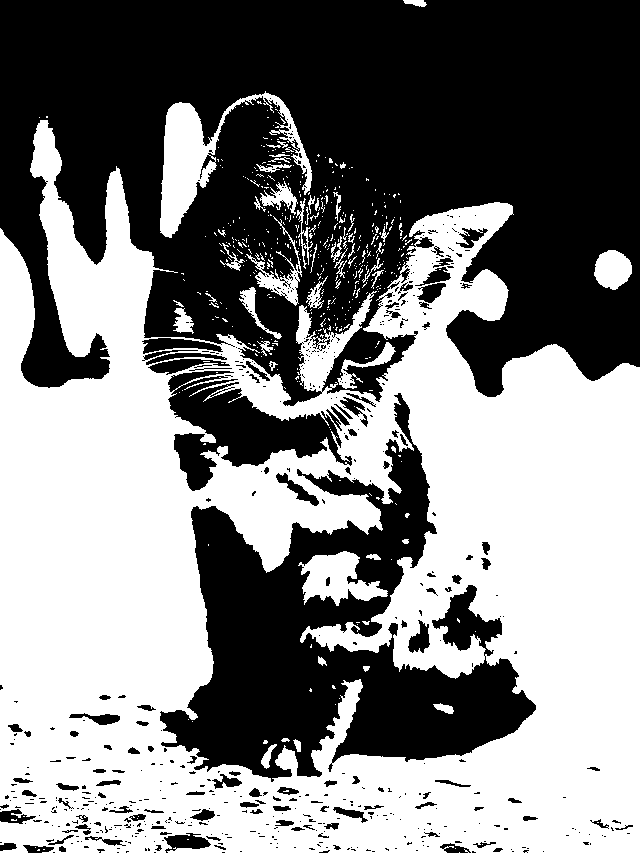

In [73]:
# RGB to monochrome method 2
l = Image.new("1", (i.width, i.height))
for y in range(i.height):
    for x in range(i.width):
        old_px = i.getpixel((x, y))
        new_px = monochrome2(old_px)
        l.putpixel((x, y), new_px)

l

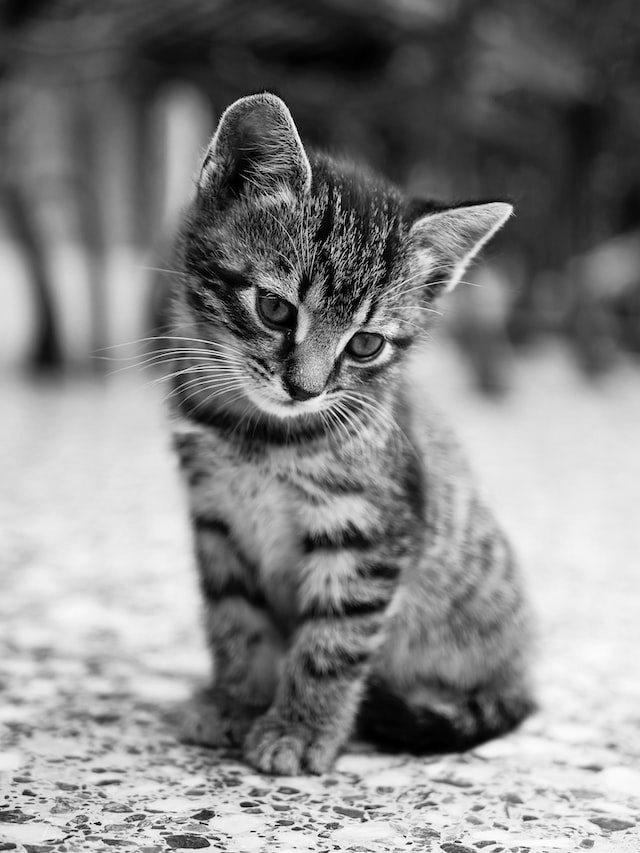

In [74]:
m = Image.new('L', (i.width, i.height))
for y in range(i.height):
    for x in range(i.width):
        px = i.getpixel((x, y))
        g = greyscale(px)
        m.putpixel((x, y), g)

m

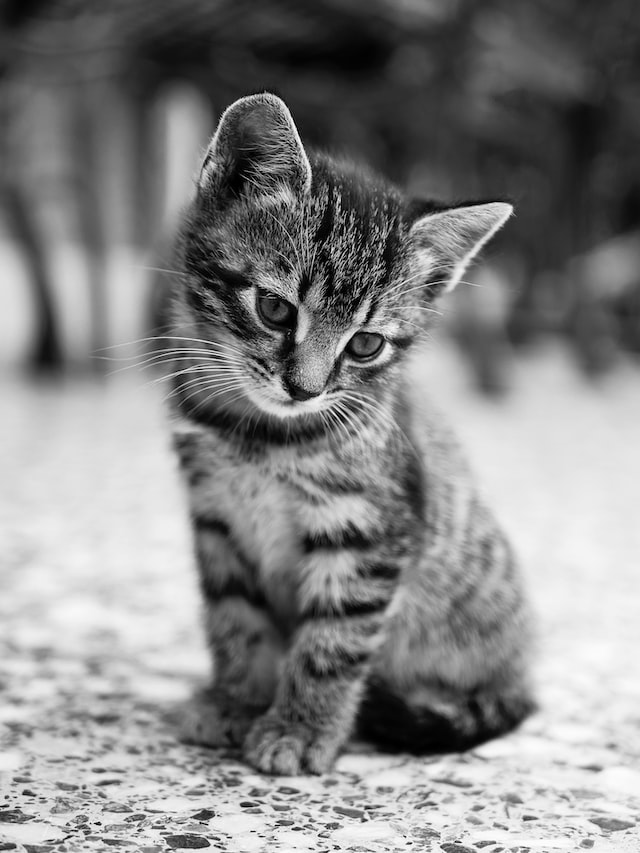

In [65]:
gry_img = i.convert('L')
gry_img

In [103]:
import numpy as np

img = np.array(k)
img.shape

(853, 640)

In [ ]:
w, h = img.shape

v_filter = np.array([[-1, 0, 1],
         [-1, 0, 1],
         [-1, 0, 1]])
h_filter = v_filter = np.array([[-1, -1, -1],
         [0, 0, 0],
         [1, 1, 1]])

laplacian_filter = np.array([[-1, -1, -1],
                             [-1, 8, -1],
                            [-1, -1, -1]])

hy = np.array ([[1,2,1],[0,0,0],[-1,-2,-1]])

# flatened_img = img.flatten()
# print(v_filter.flatten())

# ve = np.convolve(img.flatten(), v_filter.flatten(), 'same')
# ve = np.convolve(img.flatten(), h_filter.flatten(), 'same')
# ve = np.convolve(img.flatten(), laplacian_filter.flatten(), 'same')
ve = np.convolve(img.flatten(), hy.flatten(), 'same')

vimg = Image.fromarray(ve.reshape((h, w)), mode='L')
vimg